## Setup

In [2]:
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import pandas as pd

from harp_resources import process, utils
from sleap import load_and_process as lp

In [3]:
data_path = Path('/Users/rancze/Documents/Data/Mismatch_experiments/Cohort0_GCaMP_example/2024-08-08T10-05-26_B3M3')
photometry_path = Path('/Users/rancze/Documents/Data/Mismatch_experiments/Cohort0_GCaMP_example/photometry/B3M3_MMclosedOpen_day2/2024_08_08-12_08_29')

In [4]:
SessionSettings = utils.read_SessionSettings(data_path, print_contents=True)

{
    "seconds": 768959.520256,
    "value": {
        "motorSettings": {
            "nominalPulseInterval": 200,
            "initialPulseInterval": 200,
            "pulseStepInterval": 2,
            "pulsePeriod": 10
        },
        "blocks": [
            {
                "alias": "LinearMismatch",
                "playbackFilePath": "",
                "blockGainModifier": 1.0,
                "flowXToVisualGain": 0.0008,
                "flowYToVisualGain": 0.0,
                "rotaryToVisualGain": 0.0,
                "playbackToVisualGain": 0.0,
                "stimulus": {
                    "type": 0,
                    "spatialFrequency": 28.8,
                    "offset1": -90.0,
                    "extent1": 180.0,
                    "offset2": 90.0,
                    "extent2": 180.0,
                    "path": ""
                },
                "flowXToMotorGain": 0.0,
                "flowYToMotorGain": 0.0,
                "playbackToMotorGain": 0.0,

## Videography and SLEAP

In [4]:
# lp.create_flipped_videos(data_path, what_to_flip='VideoData1')

### Run SLEAP inference now

```
In the terminal:
>> conda activate sleap
>> sleap-label

Open "working_project.slp" in "SLEAP_models" directory on the NAS.
SLEAP documentation: https://sleap.ai/tutorials/tutorial.html
```

### Load videography data

In [4]:
VideoData1, VideoData2, VideoData1_Has_Sleap, VideoData2_Has_Sleap = lp.load_videography_data(data_path)

INFO:
load_and_process.load_videography_data() function expects the following format of SLEAP outputs:
"VideoData1_1904-01-01T00-00-00.sleap.csv"
"VideoData1_1904-01-01T23-59-59.sleap.csv"
"..."
Please make sure to rename SLEAP files if they are not already following this convention.


RESULTS:
Outputs of SLEAP found in VideoData1: False
Outputs of SLEAP found in VideoData2: False
Found .csv VideoData logs timestamped at:
- 1904-01-14T22:00:00.000000000
Reading dataframes finished.


### SLEAP Quality Control

In [5]:
VideoData2

,frame_idx,Seconds
0,0,1.202820e+06
1,1,1.202821e+06
2,2,1.202821e+06
3,3,1.202821e+06
4,4,1.202821e+06
...,...,...
114728,114728,1.204733e+06
114729,114729,1.204733e+06
114730,114730,1.204733e+06
114731,114731,1.204733e+06


In [6]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
VideoData2[VideoData2[columns_of_interest].isnull().all(1)]

,frame_idx,Seconds,track,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
4237,4237,443471.579488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11212,11212,443587.825152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11213,11213,443587.841824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11214,11214,443587.858496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11215,11215,443587.875136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112042,112042,445268.265056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112043,112043,445268.281728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112044,112044,445268.298400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112045,112045,445268.315072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
VideoData2[VideoData2[columns_of_interest].isnull().all(1)].index.values

array([  4237,  11212,  11213,  11214,  11215,  11216,  11217,  11218,
        11219,  11220,  11221,  11222,  11223,  13488,  13511,  13512,
        13513,  13514,  13530,  13531,  13532,  13533,  13534,  13535,
        13536,  13537,  13538,  13539,  14116,  14117,  14118,  14119,
        14120,  14121,  14122,  14123,  14124,  14125,  14126,  14127,
        14128,  14129,  15086,  15087,  15088,  15089,  15090,  18088,
        18089,  18090,  18091,  18092,  18093,  18094,  18095,  18096,
        18097,  20954,  20955,  20956,  20957,  20958,  20959,  20960,
        20961,  20962,  20963,  20964,  20965,  20966,  20967,  20971,
        20977,  20978,  20979,  20980,  20981,  20982,  20983,  20984,
        20985,  20986,  20987,  20988,  20989,  22563,  26924,  26925,
        26926,  26966,  26967,  26968,  29143,  29144,  29145,  29146,
        29147,  30338,  30339,  30340,  30341,  30342,  30343,  30344,
        30345,  30346,  30347,  30348,  30919,  30920,  30946,  30947,
      

In [8]:
all_nan_df = VideoData2[VideoData2[columns_of_interest].isnull().all(1)]
all_nan_index_array = all_nan_df.index.values

i=1
for group in lp.find_sequential_groups(all_nan_index_array):
    print(f'NaN frame group {i} with {len(group)} elements')
    i += 1

NaN frame group 1 with 1 elements
NaN frame group 2 with 12 elements
NaN frame group 3 with 1 elements
NaN frame group 4 with 4 elements
NaN frame group 5 with 10 elements
NaN frame group 6 with 14 elements
NaN frame group 7 with 5 elements
NaN frame group 8 with 10 elements
NaN frame group 9 with 14 elements
NaN frame group 10 with 1 elements
NaN frame group 11 with 13 elements
NaN frame group 12 with 1 elements
NaN frame group 13 with 3 elements
NaN frame group 14 with 3 elements
NaN frame group 15 with 5 elements
NaN frame group 16 with 11 elements
NaN frame group 17 with 2 elements
NaN frame group 18 with 12 elements
NaN frame group 19 with 4 elements
NaN frame group 20 with 13 elements
NaN frame group 21 with 1 elements
NaN frame group 22 with 2 elements
NaN frame group 23 with 1 elements
NaN frame group 24 with 4 elements
NaN frame group 25 with 2 elements
NaN frame group 26 with 1 elements
NaN frame group 27 with 1 elements
NaN frame group 28 with 3 elements
NaN frame group 29 w

In [9]:
# for col in columns_of_interest:
# indices_outside_common_nan_list
# VideoData2[VideoData2[col].isna()].index.values

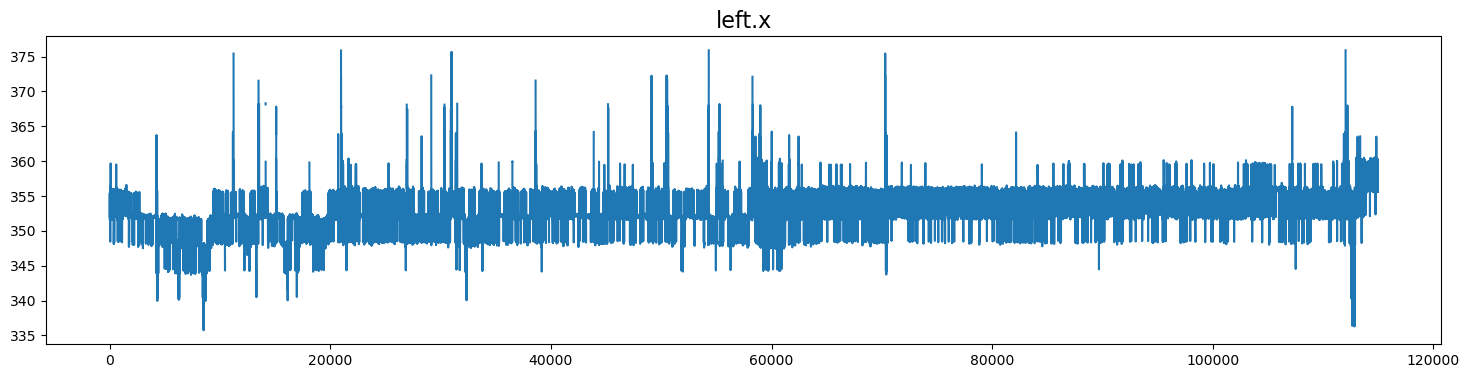

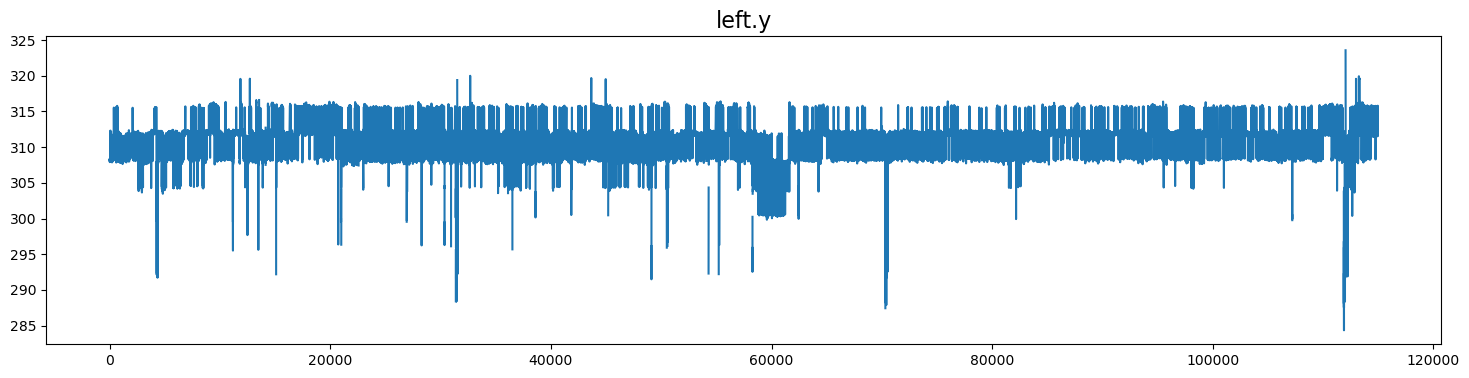

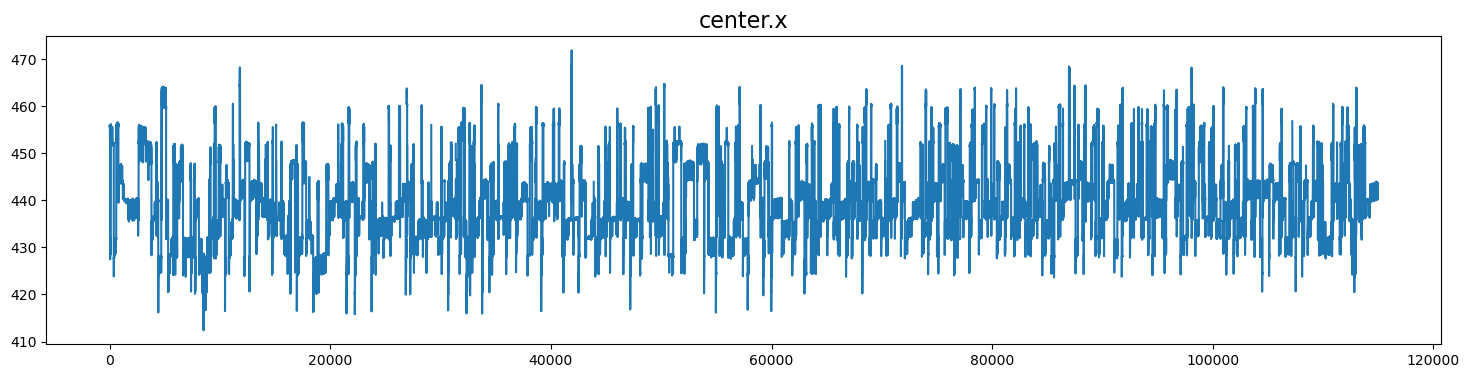

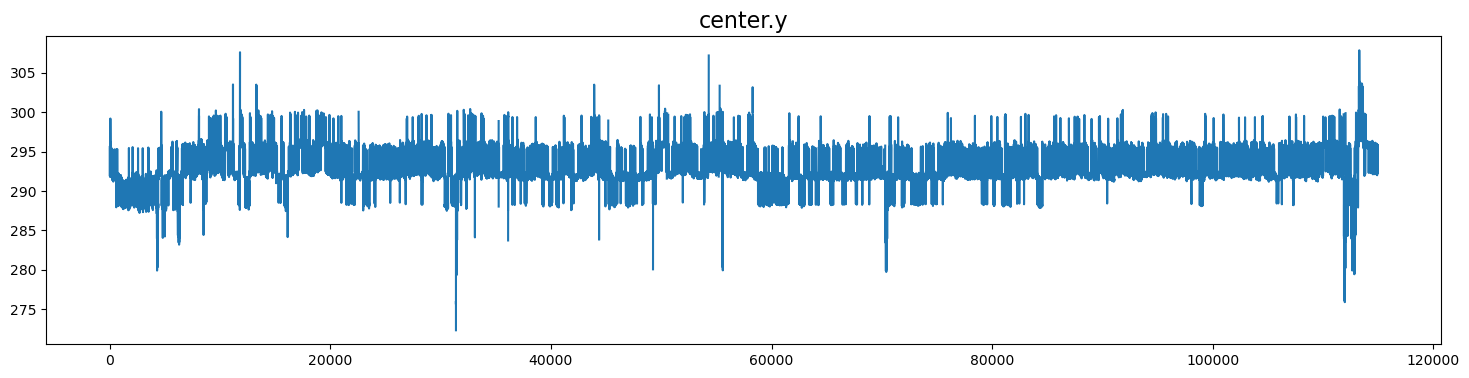

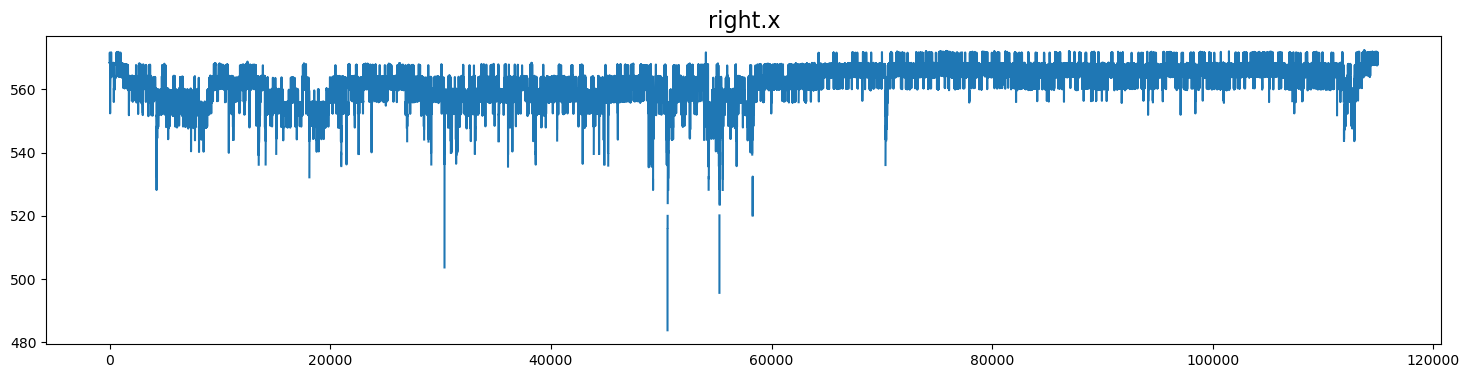

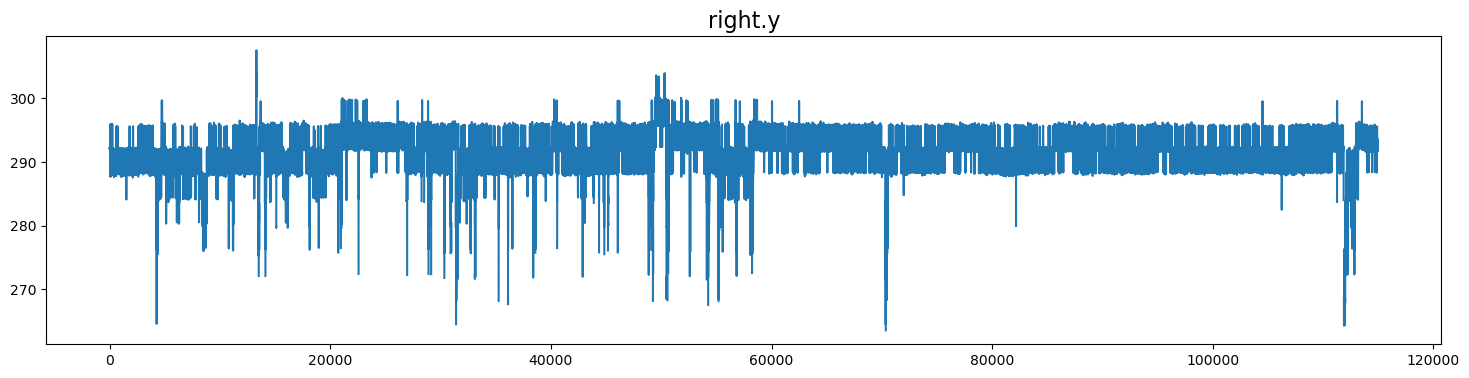

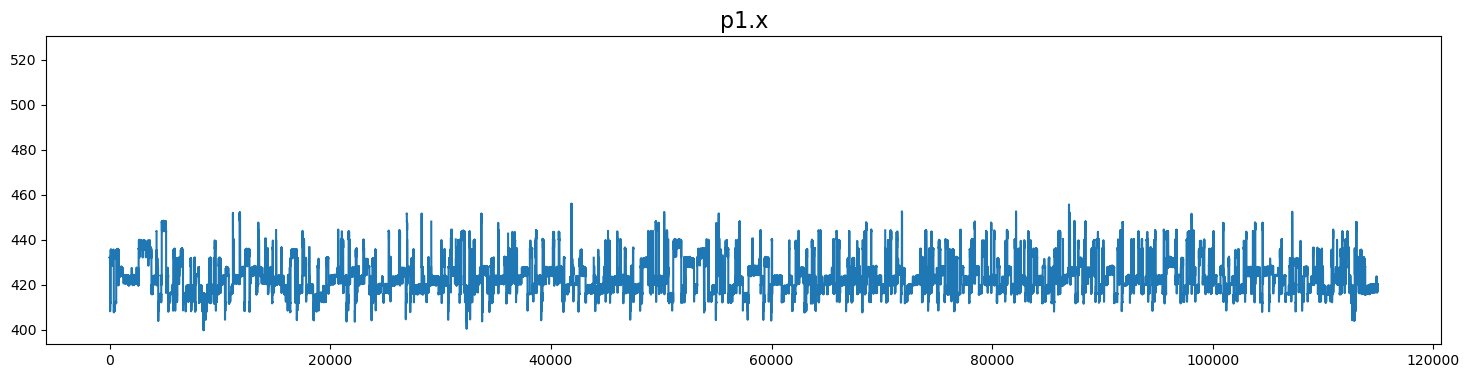

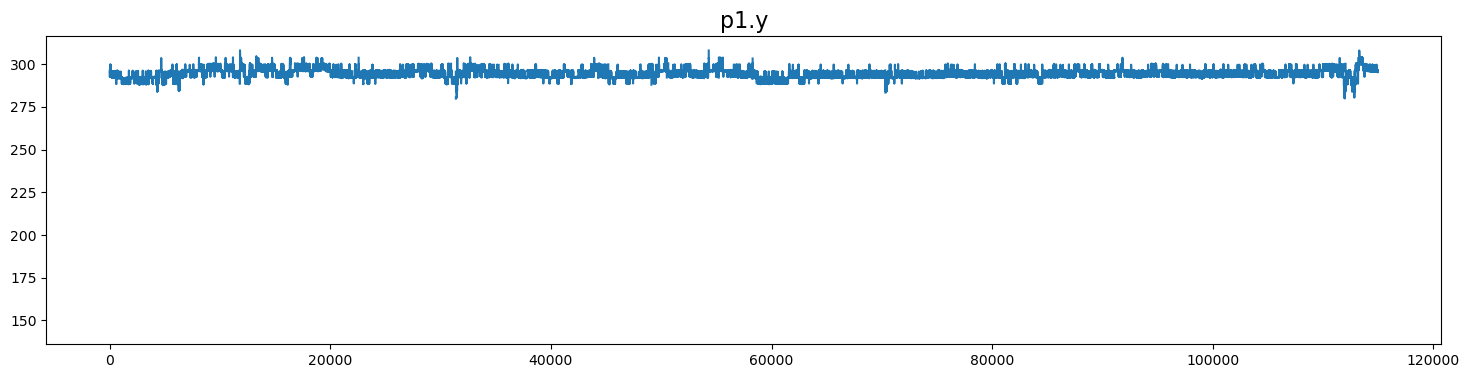

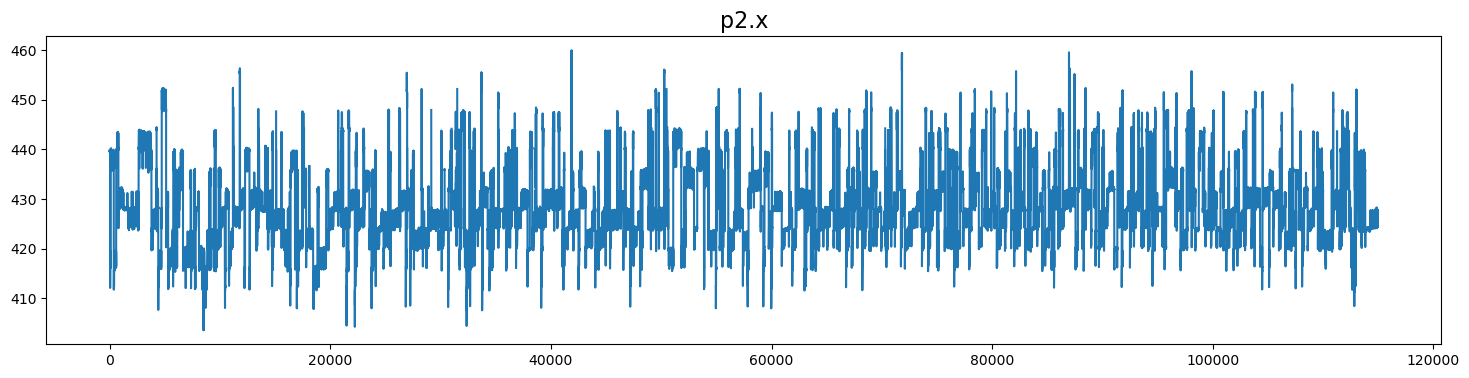

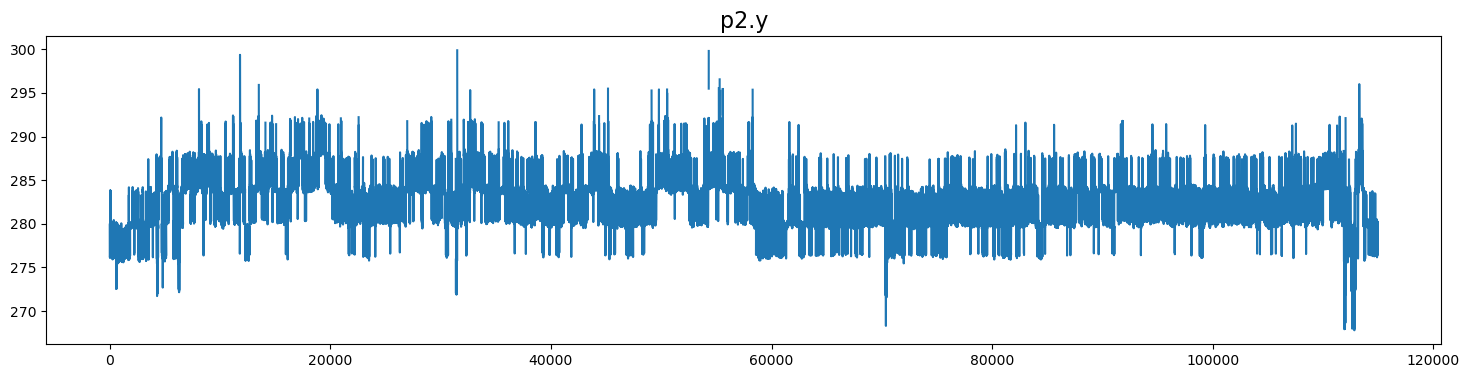

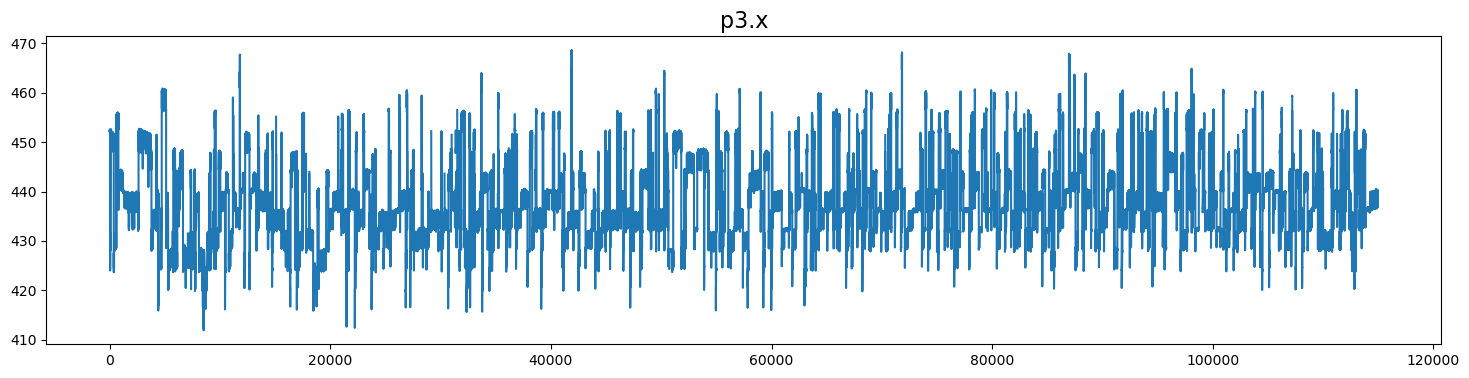

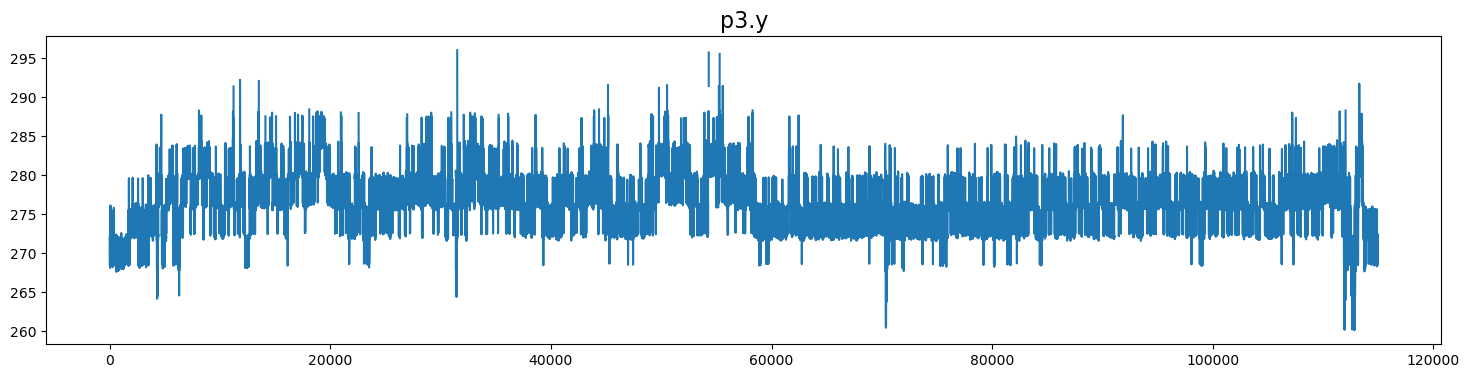

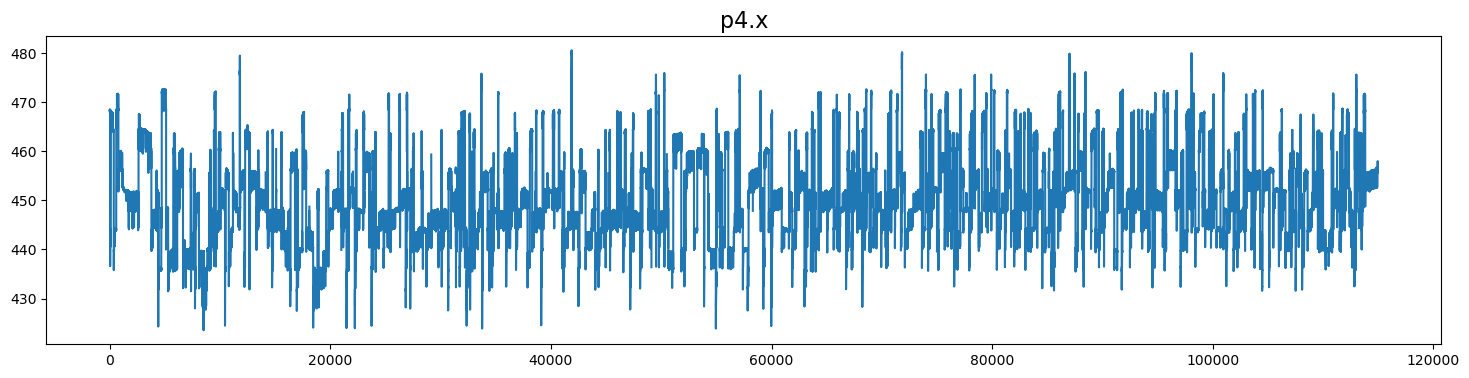

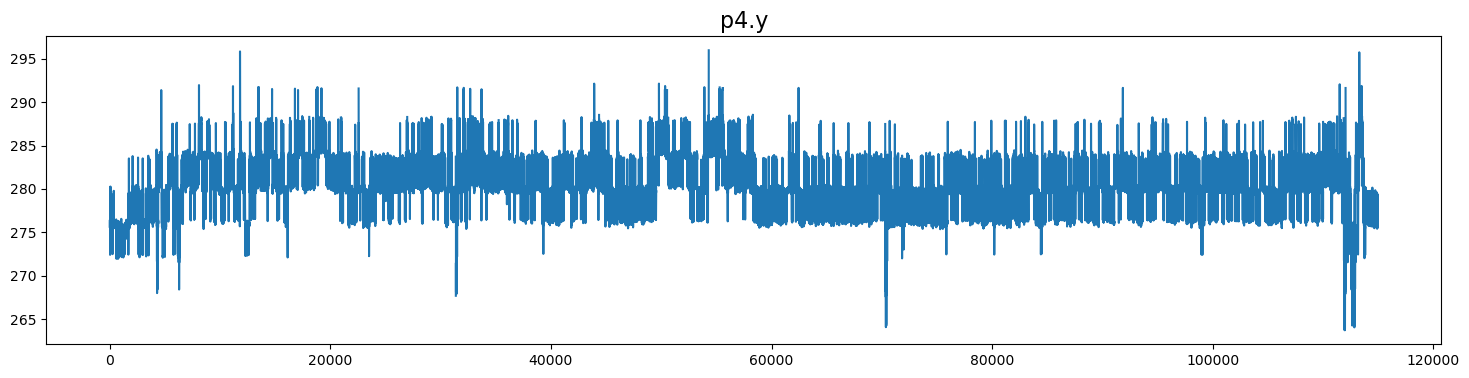

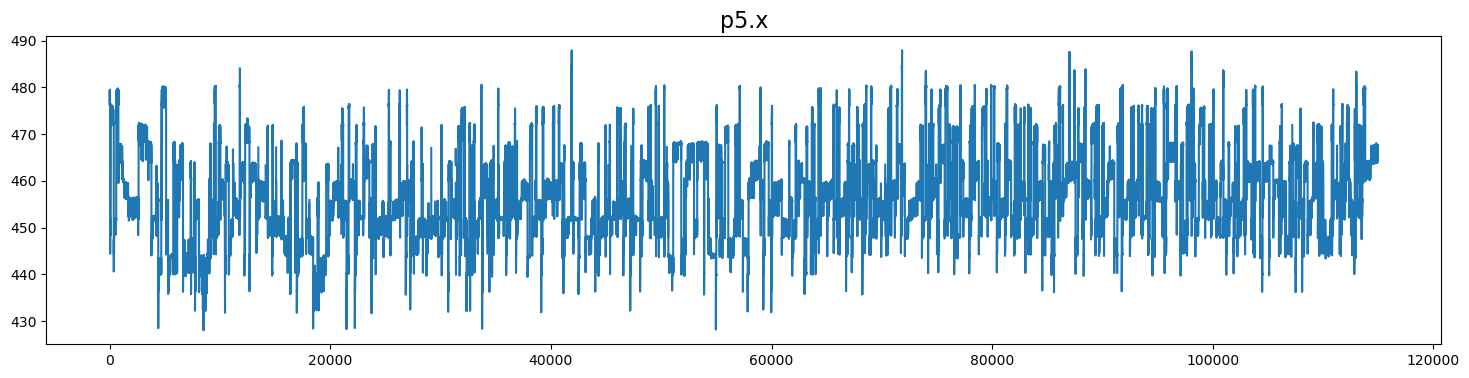

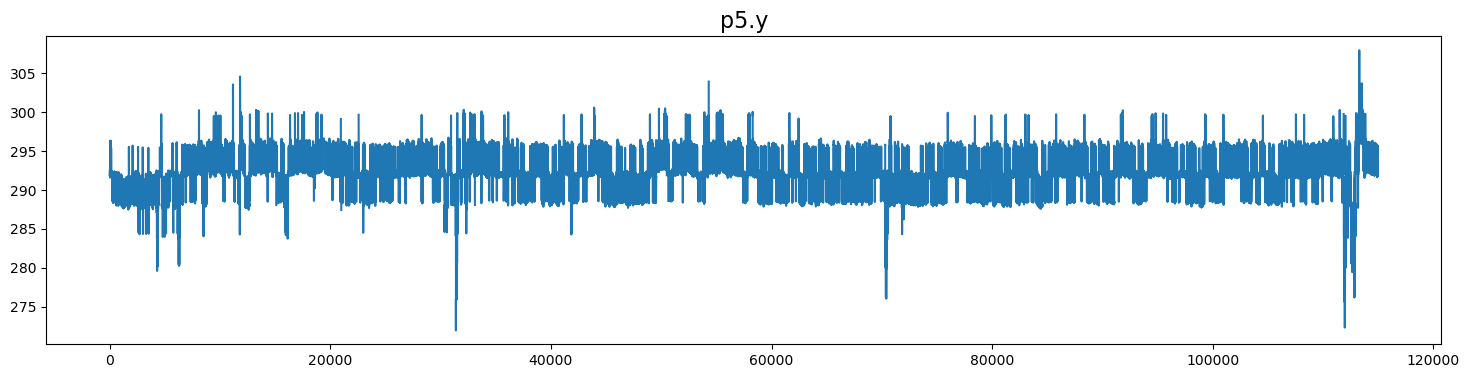

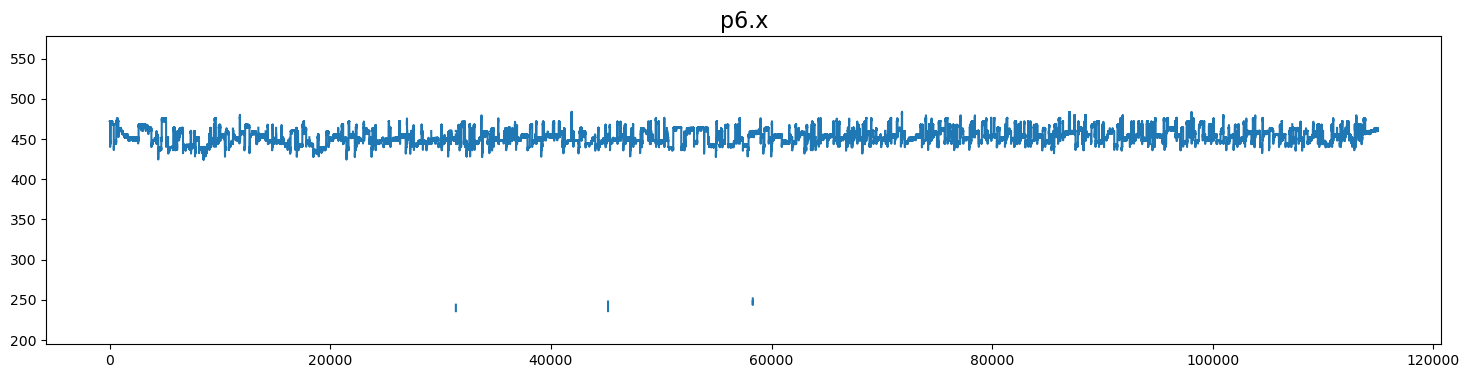

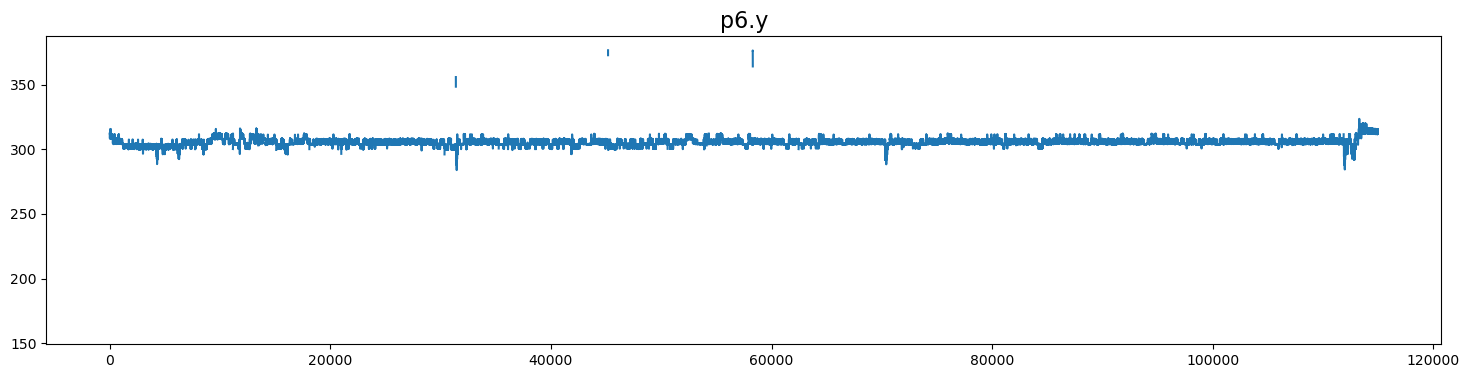

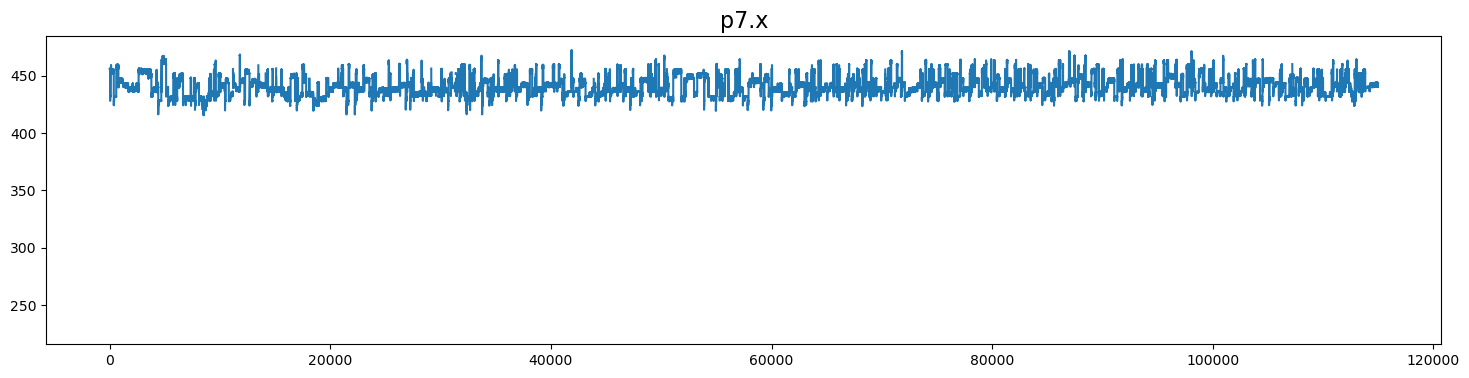

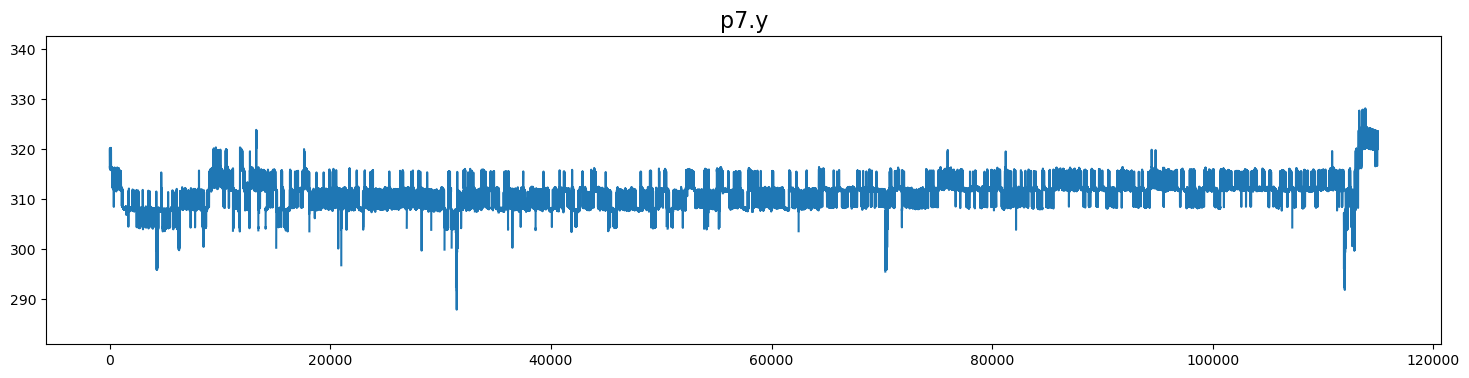

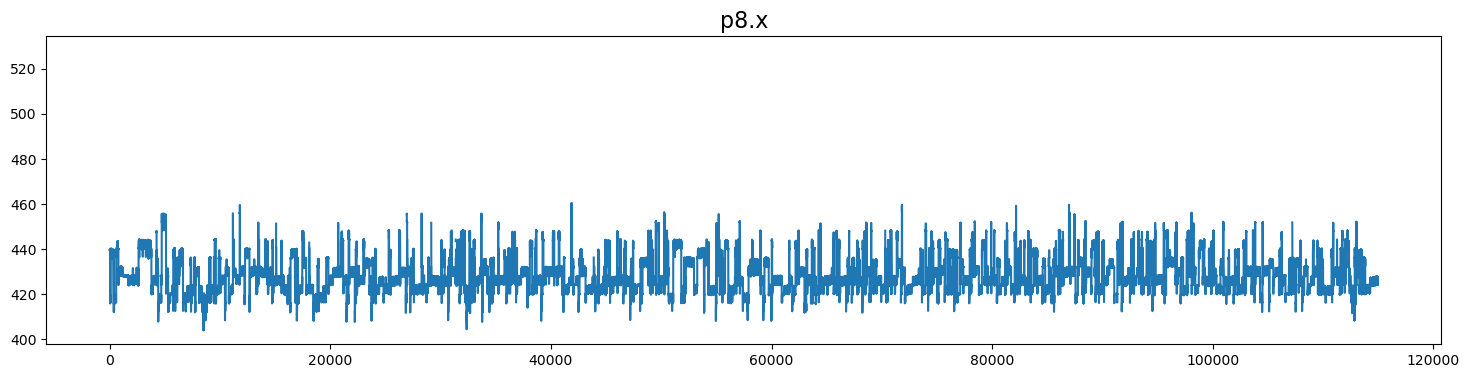

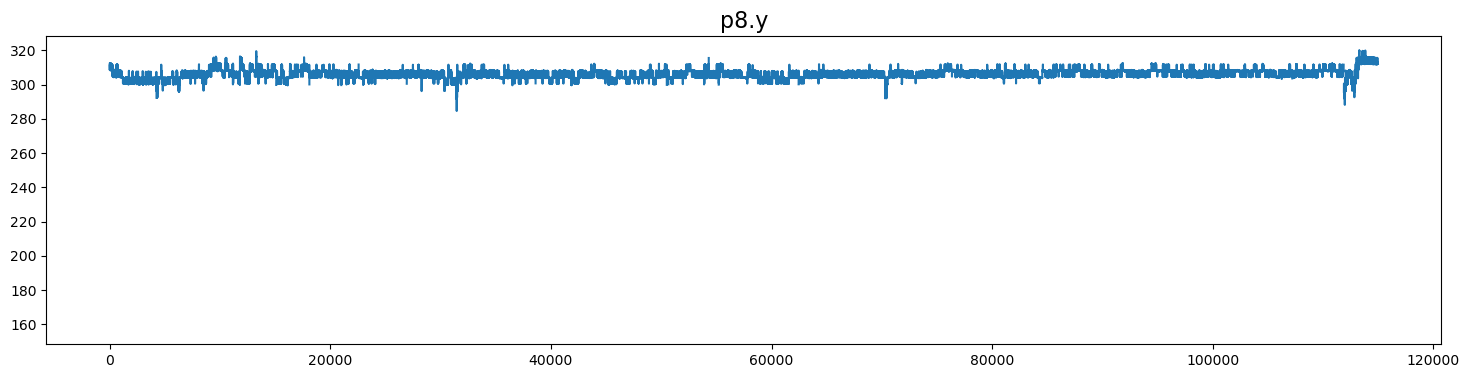

In [10]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
coordinates_dict=lp.get_coordinates_dict(VideoData2, columns_of_interest)

for col in columns_of_interest:
    plt.figure(figsize=(18,4))
    plt.title(col, fontsize=16)
    plt.plot(VideoData2[col].values)
    plt.show()

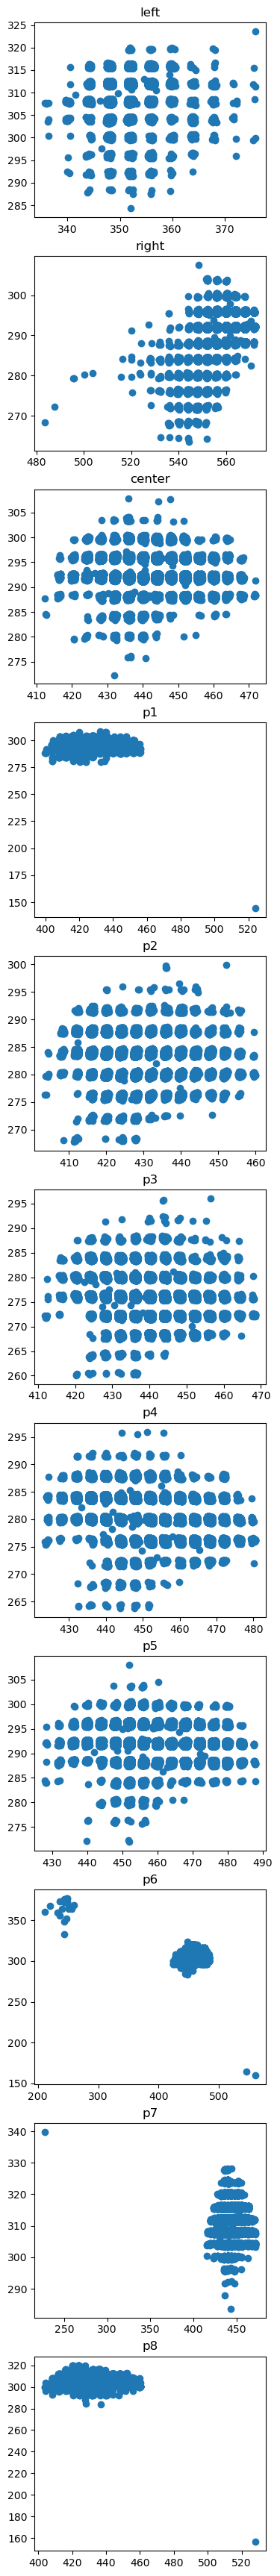

In [11]:
columns_of_interest = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(4,44))

for col in columns_of_interest:
    ax[columns_of_interest.index(col)].set_title(col)
    ax[columns_of_interest.index(col)].scatter(coordinates_dict[f'{col}.x'], coordinates_dict[f'{col}.y'])
plt.show()

### SLEAP processing

In [12]:
VideoData2 = VideoData2.interpolate()

columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
coordinates_dict=lp.get_coordinates_dict(VideoData2, columns_of_interest)

theta = lp.find_horizontal_axis_angle(VideoData2, 'left', 'center')
center_point = lp.get_left_right_center_point(coordinates_dict)

columns_of_interest = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
remformatted_coordinates_dict = lp.get_reformatted_coordinates_dict(coordinates_dict, columns_of_interest)
centered_coordinates_dict = lp.get_centered_coordinates_dict(remformatted_coordinates_dict, center_point)
rotated_coordinates_dict = lp.get_rotated_coordinates_dict(centered_coordinates_dict, theta)

columns_of_interest = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
ellipse_parameters_data, ellipse_center_points_data = lp.get_fitted_ellipse_parameters(rotated_coordinates_dict, columns_of_interest)

average_diameter = np.mean([ellipse_parameters_data[:,0], ellipse_parameters_data[:,1]], axis=0)

SleapVideoData2 = process.convert_arrays_to_dataframe(['Seconds', 'Ellipse.Diameter', 'Ellipse.Angle', 'Ellipse.Center.X', 'Ellipse.Center.Y'], [VideoData2['Seconds'].values, average_diameter, ellipse_parameters_data[:,2], ellipse_center_points_data[:,0], ellipse_center_points_data[:,1]])

## Loading and Synchronisation 

In [5]:
conversions = process.calculate_conversions_second_approach(data_path, photometry_path, verbose=False)
# After hardware ONIX clock implementation - this will have to be adapted
# Only photometry will need to be converted

OnixAnalogClock loaded in 0.90 seconds.


/Users/rancze/Documents/GitHub/vestibular_vr_pipeline/harp_resources/utils.py:153: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted_filenames = pd.to_datetime(pd.Series([x.split('_')[1].split('.')[0] for x in filenames])).sort_values()



Shape of OnixAnalogClock == [190293800] shape of OnixAnalogFrameCount == [190296000].
Cutting 2200 values from the beginning of OnixAnalogFrameCount. Data considered to be MISSING.

Calculated offset between OnixDigital and PhotometryEvents: 0
Calculation of conversions finished in 44.80 seconds.


/Users/rancze/Documents/GitHub/vestibular_vr_pipeline/harp_resources/utils.py:144: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted_filenames = pd.to_datetime(pd.Series([x.split('_')[1].split('.')[0] for x in filenames])).sort_values()


In [6]:
streams = utils.load_registers(data_path)

Photometry = utils.read_fluorescence(photometry_path)
Photometry['HARP Timestamps'] = conversions['photometry_to_harp_time'](Photometry['TimeStamp'])

OnixAnalogClock = utils.read_OnixAnalogClock(data_path)
OnixAnalogData = utils.read_OnixAnalogData(data_path, binarise=True)
ExperimentEvents = utils.read_ExperimentEvents(data_path) 

photodiode_series = pd.Series(OnixAnalogData[:,0], index=conversions['onix_to_harp_timestamp'](OnixAnalogClock))

Dataset 2024-08-08T10-05-26_B3M3 contains following registers:
H1: [32, 46, 33]
H2: [42, 39]
Registers loaded in 1.49 seconds.
OnixAnalogClock loaded in 0.81 seconds.
OnixAnalogData loaded in 96.18 seconds.


/Users/rancze/Documents/GitHub/vestibular_vr_pipeline/harp_resources/utils.py:125: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted_filenames = pd.to_datetime(pd.Series([x.split('_')[1].split('.')[0] for x in filenames])).sort_values()


In [7]:
# Adding Photometry, Eye Movements and Photodiode to the streams
streams = process.reformat_and_add_many_streams(streams, Photometry, 'Photometry', ['CH1-410', 'CH1-470', 'CH1-560'], index_column_name='HARP Timestamps')
#streams = process.reformat_and_add_many_streams(streams, SleapVideoData2, 'SleapVideoData2', ['Ellipse.Diameter', 'Ellipse.Angle', 'Ellipse.Center.X', 'Ellipse.Center.Y'])
streams = process.add_stream(streams, 'ONIX', photodiode_series, 'Photodiode')

In [1]:
#this is very memory hungry and kills the kernel even with 20ms resampling period (even though the initial value in the notebook was 0.1ms)
#on Ede's mac, it works with down to 25ms but takes a very long time 
#need to look into pad_and_resample, seems to be using U64 for example 
#also, there is a lot of data left in the memory after this step, is this necess
_ = process.get_timepoint_info(streams, print_all=True)
resampled_streams = process.pad_and_resample(streams, resampling_period='25ms', method='linear')
_ = process.get_timepoint_info(resampled_streams, print_all=True)

NameError: name 'process' is not defined

In [9]:
# Applying linear and angular conversion to Optical tracking sensor streams
# OpticalTrackingRead0X(46) converted to centimeters per second
# OpticalTrackingRead0Y(46) covnerted to degrees per second
resampled_streams['H1']['OpticalTrackingRead0X(46)'] = process.running_unit_conversion(resampled_streams['H1']['OpticalTrackingRead0X(46)']*100)
resampled_streams['H1']['OpticalTrackingRead0Y(46)'] = process.rotation_unit_conversion(resampled_streams['H1']['OpticalTrackingRead0Y(46)'])

## Usage

In [10]:
running = resampled_streams['H1']['OpticalTrackingRead0X(46)']
rotation = resampled_streams['H1']['OpticalTrackingRead0Y(46)']
photometry = resampled_streams['Photometry']['CH1-470']
# eye_movements = resampled_streams['SleapVideoData2']['Ellipse.Center.X']

In [ ]:
t = (running.index - utils.harp.REFERENCE_EPOCH).total_seconds() #date stamp to seconds 

A = t[0] #time window beginning in harp seconds, min different from dataset to dataset, None means from start
B = t[-1] #time window end in harp seconds, None means to end 
# A = 444100 
# B = A + 50

photodiode_x, photodiode_y = process.select_from_photodiode_data(OnixAnalogClock, OnixAnalogData, A, B, conversions)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,24))

ax[0].plot(t, running)
ax[0].set_title('Running')
ax[0].set_xlim([A,B])
ax[0].set_xlabel('time (seconds)')
ax[0].set_ylabel('running speed (cm/s)')

ax[1].plot(t, photometry)
ax[1].set_title('CH1-470')
ax[1].set_xlim([A,B])
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('signal magnitude')

# ax[2].plot(t, eye_movements)
# ax[2].set_title('Eye Movements')
# ax[2].set_xlim([A,B])
# ax[2].set_xlabel('time (seconds)')
# ax[2].set_ylabel('horizontal eye position (pixels)')

ax[3].plot(process.convert_datetime_to_seconds(photodiode_x), photodiode_y[:,0])
ax[3].set_title('Photodiode')
ax[3].set_xlim([A,B])
ax[3].set_xlabel('time (seconds)')
ax[3].set_ylabel('photodiode signal')

plt.show()

Selection of photodiode data finished in 73.52 seconds.


In [21]:
streams_to_save_pattern = {'H1': ['OpticalTrackingRead0X(46)', 'OpticalTrackingRead0Y(46)'], 'H2': ['Encoder(38)'], 'Photometry': ['CH1-410', 'CH1-470', 'CH1-560'], 'SleapVideoData1': ['Ellipse.Diameter', 'Ellipse.Center.X', 'Ellipse.Center.Y'], 'SleapVideoData2': ['Ellipse.Diameter', 'Ellipse.Center.X', 'Ellipse.Center.Y'], 'ONIX': ['Photodiode']}
streams_to_save_pattern

{'H1': ['OpticalTrackingRead0X(46)', 'OpticalTrackingRead0Y(46)'],
 'H2': ['Encoder(38)'],
 'Photometry': ['CH1-410', 'CH1-470', 'CH1-560'],
 'SleapVideoData1': ['Ellipse.Diameter',
  'Ellipse.Center.X',
  'Ellipse.Center.Y'],
 'SleapVideoData2': ['Ellipse.Diameter',
  'Ellipse.Center.X',
  'Ellipse.Center.Y'],
 'ONIX': ['Photodiode']}

In [22]:
process.save_streams_as_h5(data_path, resampled_streams, streams_to_save_pattern)

Encoder(38) was included in "streams_to_save_pattern", but cannot be found inside of H2 source of resampled streams.
SleapVideoData1 was included in "streams_to_save_pattern", but cannot be found inside of resampled streams.
SleapVideoData2 was included in "streams_to_save_pattern", but cannot be found inside of resampled streams.
Data saved as H5 file in 10.82 seconds to /Users/rancze/Documents/Data/Mismatch_experiments/Cohort0_GCaMP_example/2024-08-08T10-05-26_B3M3/resampled_streams_2024-08-08T10-05-26_B3M3.h5.
